In [4]:
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [5]:
np.random.seed(666)

In [6]:
production_cost = 200
selling_price = 480
discounted_price = 80

# Demand probability distribution
demand_prob = [1/3, 2/3]
demand_distributions = [
    {"mean": 100_000, "std_dev": 35_000},
    {"mean": 75_000, "std_dev": 22_500},
]

# Function to calculate profit
def calculate_profit(produced, demand, production_cost, selling_price, discounted_price):
    sold = min(produced, demand)
    unsold = max(0, produced - demand)
    
    revenue = sold * selling_price + unsold * discounted_price
    cost = produced * production_cost
    
    return revenue - cost


# Function to sample demand and weather
def sample_demand_and_weather(demand_prob, demand_distributions):
    weather = np.random.choice(len(demand_prob), p=demand_prob)
    distribution = demand_distributions[weather]
    demand = np.random.normal(distribution["mean"], distribution["std_dev"])
    return round(demand), weather

# Generate demand scenarios and corresponding weather
n_simulations = 10_000
demand_scenarios = []
weather_scenarios = []

for _ in range(n_simulations):
    demand, weather = sample_demand_and_weather(demand_prob, demand_distributions)
    demand_scenarios.append(demand)
    weather_scenarios.append(weather)

# Monte Carlo simulation function
def monte_carlo_expected_profit(produced, demand_scenarios, production_cost, selling_price, discounted_price):
    profits = []
    for demand in demand_scenarios:
        profit = calculate_profit(produced, demand, production_cost, selling_price, discounted_price)
        profits.append(profit)
    
    return np.mean(profits)

# Objective function to minimize (negative expected profit)
def objective(produced):
    return -monte_carlo_expected_profit(produced, demand_scenarios, production_cost, selling_price, discounted_price)

# Find optimal production
result = minimize_scalar(objective, bounds=(0, 100_000), method='bounded')

optimal_production = round(result.x)
max_profit = round(-result.fun)

print("Optimal number of snowboards to produce:", optimal_production)
print("Expected profit:", max_profit)

# Compute expected demand
# expected_demand = round(sum(demand_prob[i] * demand_distributions[i]["mean"] for i in range(len(demand_prob))))
expected_demand = round(np.mean(demand_scenarios))

# Compute expected profits for expected demand
expected_profits = monte_carlo_expected_profit(expected_demand, demand_scenarios, production_cost, selling_price, discounted_price)

print("Expected demand:", expected_demand)
print("Expected profits when producing exactly the expected demand:", round(expected_profits))


Optimal number of snowboards to produce: 95999
Expected profit: 19157489
Expected demand: 83274
Expected profits when producing exactly the expected demand: 18736792


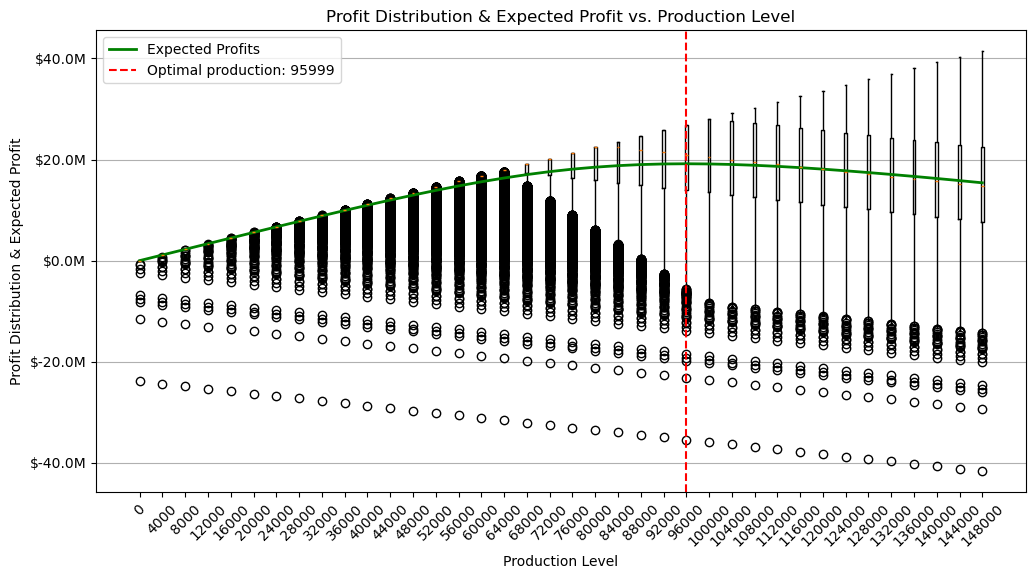

In [7]:
def millions_formatter(x, pos):
    return f"${x * 1e-6:.1f}M"

production_levels = list(range(0, 150_001, 4_000))
profit_distributions = []
expected_profits = []

for produced in production_levels:
    profits = [calculate_profit(produced, demand, production_cost, selling_price, discounted_price) for demand in demand_scenarios]
    profit_distributions.append(profits)
    expected_profits.append(np.mean(profits))

# Plot the profit distribution for each production level
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(profit_distributions, positions=production_levels, widths=500)

ax.plot(production_levels, expected_profits, color='g', linewidth=2, label='Expected Profits')

ax.set_xticks(production_levels)
ax.set_xticklabels(production_levels, rotation=45)
ax.set_xlabel("Production Level")
ax.set_ylabel("Profit Distribution & Expected Profit")
ax.set_title("Profit Distribution & Expected Profit vs. Production Level")
ax.axvline(x=optimal_production, color='r', linestyle='--', label=f'Optimal production: {optimal_production}')
ax.legend()
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax.grid(axis='y')

plt.show()


In [8]:
lambda_ = (selling_price - production_cost) / (selling_price - discounted_price) * 100
print(lambda_)

70.0


In [9]:
np.percentile(np.array(demand_scenarios), lambda_)

95997.2